In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
lam = 0.8
eps = 0.1
dt = 0.02

In [84]:
# exact_free_data = np.loadtxt("2-part-free-N_s16-lam0.2-width1.75-dt0.1.txt", dtype='float')
# exact_inter_data = np.loadtxt("2-part-inter-N_s16-lam0.2-eps0.1-width1.5-dt0.1.txt", dtype='float')

trunc_free_data = np.loadtxt("2-part-free-trunc-N_s32-lam0.8-width1.5-dt0.02.txt", dtype='float')
trunc_inter_data = np.loadtxt("2-part-inter-trunc-N_s32-lam0.8-eps0.1-width1.5-dt0.02.txt", dtype='float')

approx_free_data = np.loadtxt("2-part-free-N_s32-lam0.8-width1.5-dt0.02.txt", dtype='float')
approx_inter_data = np.loadtxt("2-part-inter-N_s32-lam0.8-eps0.1-width1.5-dt0.02.txt", dtype='float')

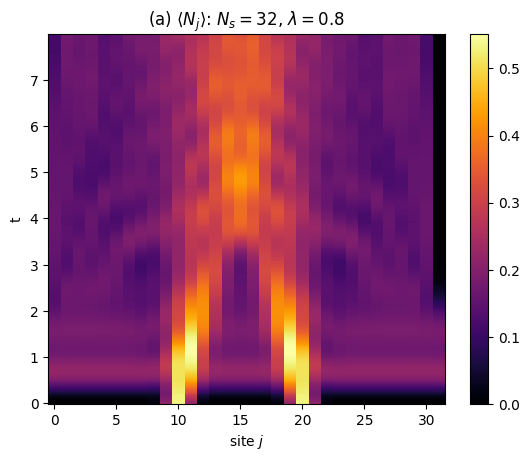

In [85]:
N_s = len(trunc_free_data[0])
N_t = len(approx_free_data)

sites = np.linspace(0, N_s-1, N_s)
times = np.linspace(0, (N_t - 1) * dt, N_t)
Sites, Times = np.meshgrid(sites, times)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_aspect(0.5)
plt.pcolormesh(Sites, Times, approx_free_data, cmap='inferno')
plt.xlabel(r'site $j$')
plt.ylabel(r't')
title = r'(a) $\langle N_j \rangle$: $N_s = $' + str(N_s)
title += r', $\lambda = $' + str(lam)
# title += r', $d_{cut} = $' + str(dbond)
plt.title(title)
plt.colorbar()
folder = 'approx-gwp/'
file = 'OccNum-Ns' + str(N_s)
file += '-lam' + str(lam)
# file += '-dcut' + str(dbond)
file += '-dt' + str(dt)
# plt.savefig(folder + file + '.png')

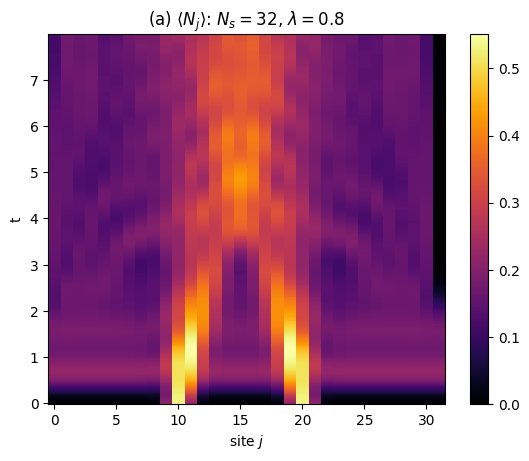

In [86]:
plt.pcolormesh(Sites, Times, trunc_free_data, cmap='inferno')
plt.xlabel(r'site $j$')
plt.ylabel(r't')
title = r'(a) $\langle N_j \rangle$: $N_s = $' + str(N_s)
title += r', $\lambda = $' + str(lam)
# title += r', $d_{cut} = $' + str(dbond)
plt.title(title)
plt.colorbar()

Text(0.5, 1.0, '(c) Approx Wave Packet Compare: $N_s=$32, $\\lambda=$0.8, $\\epsilon=$0.1')

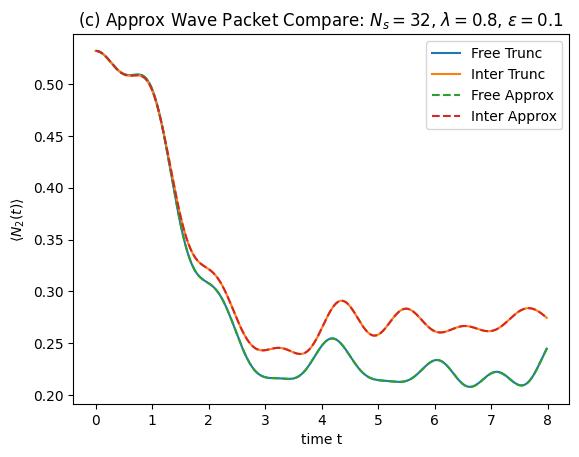

In [87]:
# exact_free_probs = np.array(Exact_Probs)
# approx_free_probs = np.array(Approx_Probs)
# pexact_probs = np.array(pExact_Probs)
# papprox_probs = np.array(pApprox_Probs)



# plt.plot(times[50:], exact_free_data[50:, 2], label='Free Trunc')
# plt.plot(times[50:], exact_inter_data[50:, 2], label='Inter Trunc')
plt.plot(times, trunc_free_data[:, 10], label='Free Trunc')
plt.plot(times, trunc_inter_data[:, 10], label='Inter Trunc')
plt.plot(times, approx_free_data[:, 10], linestyle='--', label='Free Approx')
plt.plot(times, approx_inter_data[:, 10], linestyle='--', label='Inter Approx')


plt.legend()
plt.xlabel('time t')
plt.ylabel(r'$\langle N_2(t) \rangle$')
title = '(c) Approx Wave Packet Compare: $N_s=$' + str(N_s)
title += r', $\lambda=$' + str(lam)
title += r', $\epsilon=$' + str(eps)
plt.title(title)

In [15]:
import numpy as np
from scipy.interpolate import CubicSpline

# Create a cubic spline interpolation function
free_exact = CubicSpline(times[100:275], exact_free_data[100:275, 2])
inter_exact = CubicSpline(times[100:275], exact_inter_data[100:275, 2])

ts = np.arange(15, 21.0, 0.005)

tds = []
for i in range(len(ts)):
    for j in range(i, len(ts)):
        if np.isclose(free_exact(ts[j]), inter_exact(ts[i]), atol=1e-05):
            tds.append(ts[j] - ts[i])
np.average(tds)

KeyboardInterrupt: 

In [ ]:
# Create a cubic spline interpolation function
free_approx = CubicSpline(times[100:275], approx_free_data[100:275, 2])
inter_approx = CubicSpline(times[100:275], approx_inter_data[100:275, 2])

ts = np.arange(15, 21, 0.005)

tds_approx = []
for i in range(len(ts)):
    for j in range(i, len(ts)):
        if np.isclose(free_approx(ts[j]), inter_approx(ts[i]), atol=1e-05):
            tds_approx.append(ts[j] - ts[i])
np.average(tds_approx)

0.999735449735606

In [32]:
exact_peaks = []
exact_peaks_inter = []

exact_free = exact_free_data[:, 2]
exact_inter= exact_inter_data[:, 2]

for i in range(N_t):
    if i != 0 and i != N_t - 1:
        if exact_free[i - 1] < exact_free[i] and exact_free[i + 1] < exact_free[i]:
            exact_peaks.append(dt * i)
        if exact_inter[i - 1] < exact_inter[i] and exact_inter[i + 1] < exact_inter[i]:
            exact_peaks_inter.append(dt * i)
print(exact_peaks)
print(exact_peaks_inter)

[8.6, 10.4, 12.200000000000001, 17.2, 18.2]
[9.0, 10.600000000000001, 17.6]


In [33]:
approx_peaks = []
approx_peaks_inter = []

approx_free = approx_inter_data[:, 2]
approx_inter= approx_free_data[:, 2]

for i in range(N_t):
    if i != 0 and i != N_t -1:
        if approx_free[i - 1] < approx_free[i] and approx_free[i + 1] < approx_free[i]:
            approx_peaks.append(dt * i)
        if approx_inter[i - 1] < approx_inter[i] and approx_inter[i + 1] < approx_inter[i]:
            approx_peaks_inter.append(dt * i)
print(approx_peaks)
print(approx_peaks_inter)

[9.0, 17.6]
[8.8, 10.4, 12.200000000000001, 17.2, 18.400000000000002]


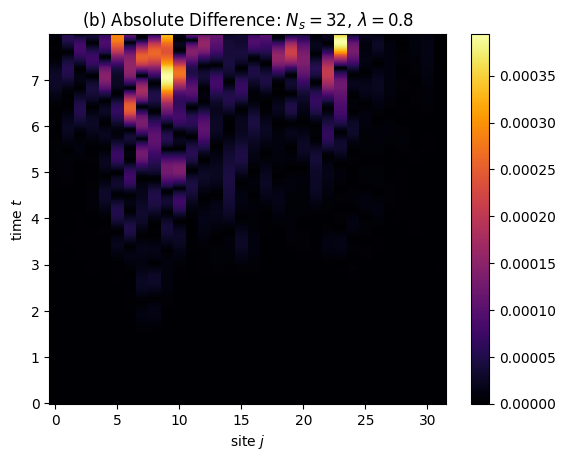

In [88]:
abs_diff = np.zeros((N_t, N_s), dtype='float')
for i in range(N_t):
    for j in range(N_s):
        abs_diff[i, j] = np.abs(trunc_free_data[i, j] - approx_free_data[i, j])

plt.pcolormesh(Sites, Times, abs_diff, cmap='inferno')
plt.xlabel(r'site $j$')
plt.ylabel(r'time $t$')
title = r'(b) Absolute Difference: $N_s = $' + str(N_s)
title += r', $\lambda = $' + str(lam)
# title += r', $d_{cut} = $' + str(dbond)
plt.title(title)
plt.colorbar()
folder = 'approx-gwp/'
file = 'trunc-approx-inter-AbsDiff-Ns' + str(N_s)
file += '-lam' + str(lam)
# file += '-dcut' + str(dbond)
file += '-dt' + str(dt)
plt.savefig(folder + file + '.png')

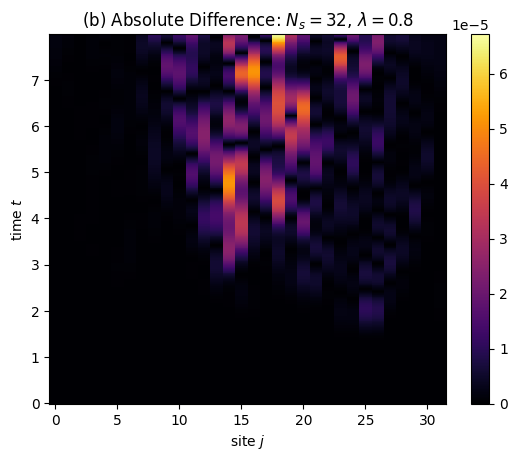

In [90]:
abs_diff = np.zeros((N_t, N_s), dtype='float')
for i in range(N_t):
    for j in range(N_s):
        abs_diff[i, j] = np.abs(trunc_inter_data[i, j] - approx_inter_data[i, j])

plt.pcolormesh(Sites, Times, abs_diff, cmap='inferno')
plt.xlabel(r'site $j$')
plt.ylabel(r'time $t$')
title = r'(b) Absolute Difference: $N_s = $' + str(N_s)
title += r', $\lambda = $' + str(lam)
plt.title(title)
plt.colorbar()

In [91]:
perc_error = []
for i in range(N_t):
    for j in range(N_s):
        if trunc_inter_data[i, j] > 0.001:
            perc_error.append(np.abs(1 - approx_inter_data[i, j]/trunc_inter_data[i,j]) * 100)

In [92]:
np.average(perc_error)

np.float64(0.0016508094881763542)